In [1]:
import numpy as np #math
import matplotlib.pyplot as plt #graphs and plots
import pandas as pd #Data manipulation
import seaborn as sns #Visualization
%matplotlib inline 
import gmplot
#Includes the plot inside the notebook
#% Makes it a proxy for a commmandline
#sns.set(color_codes = True)

In [2]:
#Loading data into the workbook
pd.set_option('display.max_rows', None)
df_confirmed = pd.read_csv('/Users/MACOS/Desktop/COVID19/time_series_covid_19_confirmed(edited).csv')
df_deaths = pd.read_csv('/Users/MACOS/Desktop/COVID19/time_series_covid_19_deaths(edited).csv')
df_recovered = pd.read_csv('/Users/MACOS/Desktop/COVID19/time_series_covid_19_recovered(edited).csv')


In [3]:
#I. EDA
#I.1. Display the top and bottom observations
#print(df_confirmed.head())
#print(df_deaths.head())
#print(df_recovered.head())


In [4]:
#I.2. Check the data types
df_confirmed_type = df_confirmed.dtypes
df_deaths_type = df_deaths.dtypes
df_recovered_type = df_recovered.dtypes
#print(df_confirmed_type)

In [5]:
#Shape of the data
print(df_confirmed.shape)
print(df_deaths.shape)
print(df_recovered.shape)

(185, 102)
(185, 102)
(185, 102)


In [6]:
#I.3. Cleaning the data
#a. Dropping Duplicates
duplicaterows = df_confirmed[df_confirmed.duplicated()]
print(duplicaterows.shape)
if duplicaterows.shape[0]==0:
    print("There is no duplicate rows")
else:
    df_confirmed = df_confirmed.drop_duplicates()
    
duplicaterows = df_deaths[df_deaths.duplicated()]
print(duplicaterows.shape)
if duplicaterows.shape[0]==0:
    print("There is no duplicate rows")
else:
    df_deaths = df_deaths.drop_duplicates()

duplicaterows = df_recovered[df_recovered.duplicated()]
print(duplicaterows.shape)
if duplicaterows.shape[0]==0:
    print("There is no duplicate rows")
else:
    df_recovered = df_recovered.drop_duplicates()
    
#b. Dropping missing values
#print(df.isnull().sum())
#num_missing = (df['Confirmed'] == 0).sum()
#dataset.fillna(dataset.mean(), inplace=True)
# df = df.dropna() # Dropping NA values
#c. Replacing missing values with the mean of the rest

(0, 102)
There is no duplicate rows
(0, 102)
There is no duplicate rows
(0, 102)
There is no duplicate rows


In [95]:
#Add in the date of lock downs and population of each country
df_lockdowndates = pd.read_csv('/Users/MACOS/Desktop/COVID19/countryLockdowndates.csv')
df_population = pd.read_csv('/Users/MACOS/Desktop/COVID19/population_by_country_2020.csv')


India


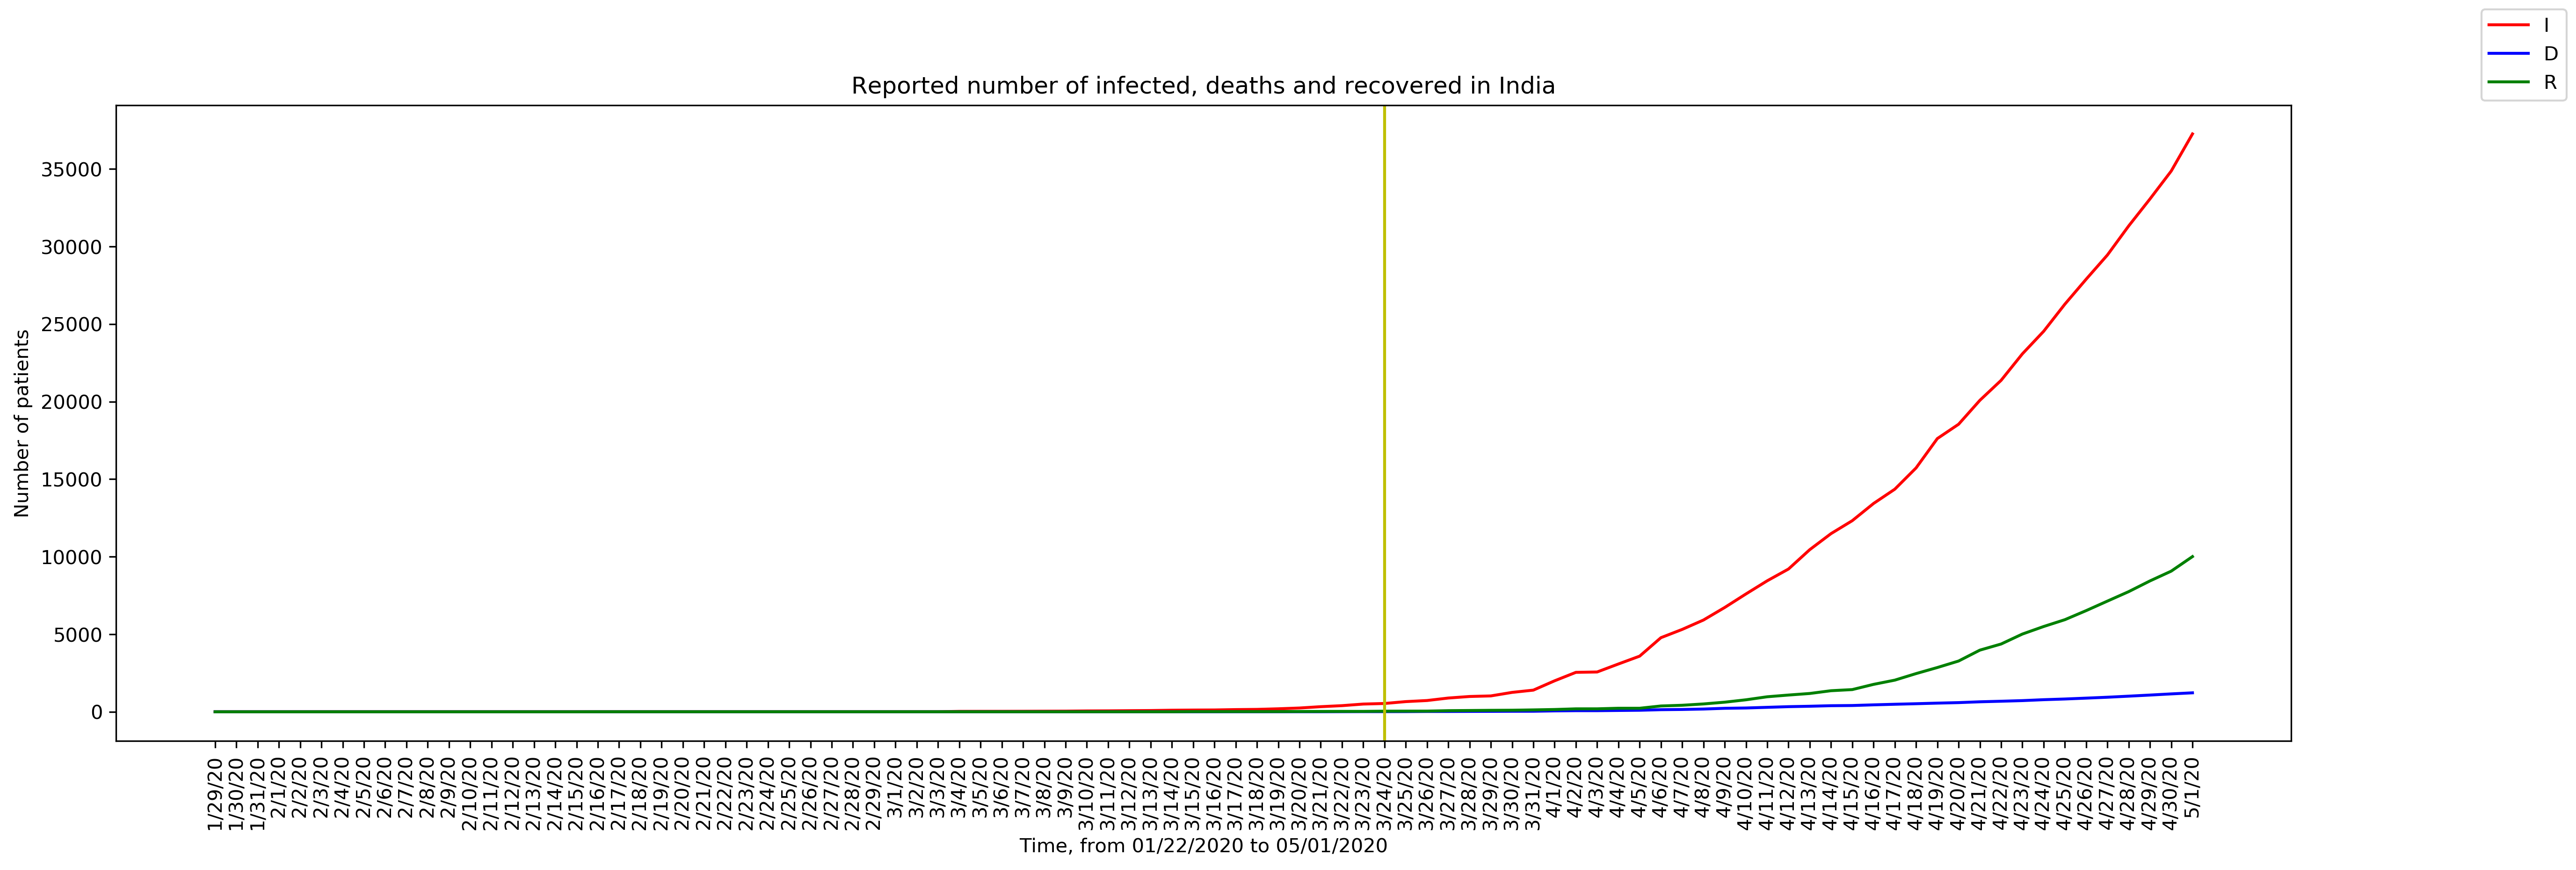

In [160]:
#import plotly.io as pio
#I.5. Visualization
###############Confirmed Infecteds################
#a. Line graphs of every place recorded
Place = 'India' #Modify this string to change the 
DateofPlace = list()
ConfirmedsatPlace = list()
DeathsatPlace = list()
RecoveredsatPlace = list()

index = 0
for i in range(df_confirmed.shape[0]):
    if(df_confirmed['Country/Region'][i] == Place):
        index = i #Locating the row where the place is in the df for confirmed and deaths
        break
#print(df_confirmed['Country/Region'][i])
#print(index)

for col in df_confirmed.columns:
    DateofPlace.append(col)
DateofPlace = DateofPlace[1:]     
#print(DateofPlace)

for col in df_confirmed.columns:
    ConfirmedsatPlace.append(df_confirmed[col][index])
    DeathsatPlace.append(df_deaths[col][index])
    RecoveredsatPlace.append(df_recovered[col][index])
    
RecoveredsatPlace = RecoveredsatPlace[1:]  
ConfirmedsatPlace = ConfirmedsatPlace[1:]  
DeathsatPlace = DeathsatPlace[1:]  
#print(ConfirmedsatPlace)
#print(DeathsatPlace)

numberofzeroes = 0
for i in ConfirmedsatPlace:
    if(i == 0):
        numberofzeroes += 1
#print(numberofzeroes)

#Delete the 0s so that the graph will only start when the place starts to have confirmed patients
if(numberofzeroes>0):
    ConfirmedsatPlace = ConfirmedsatPlace[(numberofzeroes-1):]
    DateofPlace = DateofPlace[(numberofzeroes-1):]  
    DeathsatPlace = DeathsatPlace[(numberofzeroes-1):]
    RecoveredsatPlace = RecoveredsatPlace[(numberofzeroes-1):]
#print(DateofPlace)
#print(ConfirmedsatPlace)
#print(DeathsatPlace)
#print(RecoveredsatPlace)


#Determining Lockdown date: 
for i in range(df_lockdowndates.shape[0]):
    if(df_lockdowndates['Country/Region'][i] == Place and str(df_lockdowndates['Province'][i]) == "nan" ):
        if (str(df_lockdowndates['Country/Region'][i]) == "nan"):
            print("There's no available lock down dates.")
            break
        index = i #Reusing variable index
        break
print(df_lockdowndates['Country/Region'][i])
LockDownDate = str(df_lockdowndates['Date'][i])
if ( LockDownDate == "nan"):
    print("There's no available lock down dates.")
else:
    temp = ""
    if(len(LockDownDate) == 10):
        temp = LockDownDate[4] + '/' + LockDownDate[0] + LockDownDate[1] + '/20'
    elif(len(LockDownDate) == 7):
        temp = LockDownDate[3] + '/' + LockDownDate[0] + LockDownDate[1] + '/20'
    else:
        temp = LockDownDate[2] + '/' + LockDownDate[0] + '/20'
    LockDownDate = temp
        
#Ploting these line against time
fig = plt.figure(figsize = (20,6), dpi = 300)
line1 = plt.plot(DateofPlace, ConfirmedsatPlace, color = 'r')
line2 = plt.plot(DateofPlace, DeathsatPlace, color = 'b')
line3 = plt.plot(DateofPlace, RecoveredsatPlace, color = 'g')
#Drawing the lockdown date
plt.axvline(x=LockDownDate, color = 'y')

plt.xlabel('Time, from 01/22/2020 to 05/01/2020')
plt.xticks(rotation=90)
plt.ylabel('Number of patients')
plt.title('Reported number of infected, deaths and recovered in ' + Place)
fig.legend('IDR')
plt.show()
fig.savefig(Place + "_COVID19.png", dpi = 300) #save figure

In [161]:
#II. S-I-R models
#Using the SIR model to help answer crucial questions about the pandemic

#Creating a constant for total population
S = 0 #Starting Susceptible = Total Population
R = 0 #Starting Removed = 0
for i in range(df_population.shape[0]):
    if(df_population['Country/Region'][i] == Place):
        S = df_population['Population'][i]
        break
        
#print(S)

#Creating I(t) and R(t)
i = ConfirmedsatPlace #Number of infected based on time
#print(i)
I = i[0] #Starting Infected
r = list() #Number of removed based on time
s = list()
for j in range(len(ConfirmedsatPlace)):
    r.append(DeathsatPlace[j]+ RecoveredsatPlace[j])
    s.append(S - r[j] - i[j])
print(s)
print(i)
print(r)

[1377233523, 1377233522, 1377233522, 1377233522, 1377233521, 1377233520, 1377233520, 1377233520, 1377233520, 1377233520, 1377233520, 1377233520, 1377233520, 1377233520, 1377233520, 1377233520, 1377233520, 1377233520, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233517, 1377233515, 1377233515, 1377233492, 1377233490, 1377233489, 1377233486, 1377233481, 1377233477, 1377233463, 1377233456, 1377233445, 1377233435, 1377233415, 1377233395, 1377233389, 1377233364, 1377233350, 1377233310, 1377233254, 1377233166, 1377233093, 1377232987, 1377232937, 1377232811, 1377232731, 1377232543, 1377232428, 1377232377, 1377232138, 1377231968, 1377231319, 1377230717, 1377230692, 1377230126, 1377229607, 1377228234, 1377227641, 1377226923, 1377225952, 1377224905, 1377223820, 1377222907, 1377221531, 1377220284, 1377219364, 1377217877, 1377216644, 1377214817, 1377212495, 1377211119, 137

In [162]:
#Finding the rate of change per day for S
s_diff = list()
s_diff.append(0)

for x in range(len(s)):
    if(x>0):
        s_diff.append(s[x] - temp)
    temp = s[x]
    
#print(s_diff)
#print(len(s))
#print(len(s_diff))

#Finding the rate of change per day for I
i_diff = list()
i_diff.append(0)

for x in range(len(i)):
    if(x>0):
        i_diff.append(i[x] - temp)
    temp = i[x]
    
#print(i_diff)
#print(len(i))
#print(len(i_diff))

#Finding the rate of change per day for R
r_diff = list()
r_diff.append(0)

for x in range(len(r)):
    if(x>0):
        r_diff.append(r[x] - temp)
    temp = r[x]
    
#print(r_diff)
#print(len(r))
#print(len(r_diff))

print(s_diff)
print(i_diff)
print(r_diff)

[0, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, -23, -2, -1, -3, -5, -4, -14, -7, -11, -10, -20, -20, -6, -25, -14, -40, -56, -88, -73, -106, -50, -126, -80, -188, -115, -51, -239, -170, -649, -602, -25, -566, -519, -1373, -593, -718, -971, -1047, -1085, -913, -1376, -1247, -920, -1487, -1233, -1827, -2322, -1376, -2296, -1721, -2389, -1998, -2239, -2247, -2233, -2552, -2499, -2507, -3402]
[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 23, 2, 1, 3, 5, 4, 13, 6, 11, 9, 20, 11, 6, 23, 14, 38, 50, 86, 66, 103, 37, 121, 70, 160, 100, 37, 227, 146, 601, 545, 24, 515, 506, 1190, 533, 605, 809, 873, 848, 759, 1248, 1034, 835, 1108, 922, 1370, 1893, 924, 1541, 1290, 1707, 1453, 1753, 1607, 1561, 1873, 1738, 1801, 2394]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 9, 0, 2, 0, 2, 6, 

In [167]:
#Questions:
#Q1: Will it spread?
#Let rx be the rate of contact between I and S, where s'(t) = -r*I*S
rx = list()
for x in range(len(s)):
    if(i[x] == 0 or s[x] == 0):
        rx.append(0)
    else:
        rx.append(-s_diff[x]/(i[x]*s[x]))
print(rx)

#Let a be the rate of removed, where r'(t) = a*I
a = list()
for x in range(len(r)):
    if(i[x] == 0):
        a.append(0)
    else:
        a.append(r_diff[x]/i[x])
print(a)

#i'(t) = (rIS - aI) <= (rIS0 - aI) = I(rS0 - a)
#Where S0 is the initial susceptible a.k.a total population
#Thus we have a list of Basic Reproduction Number:
#R0 = rS0/a

print(S)
R0 = list()
for x in range(len(a)):
    if(a[x] == 0):
        R0.append(0)
    else:
        R0.append(round((rx[x] * S / a[x]),2))
    
print(R0)




[0, 7.260932761408635e-10, 0.0, 0.0, 3.630466383340375e-10, 2.420310923984288e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.260932787769208e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.9043731193253746e-10, 0.0, 5.964337755362774e-10, 4.840621953410868e-11, 2.342236430770457e-11, 6.406705545180671e-11, 9.308888432776069e-11, 6.754356277817482e-11, 1.8152332681158503e-10, 8.197827704125393e-11, 1.0941132169996736e-10, 8.854796609856856e-11, 1.4237124167695932e-10, 1.2851209612331386e-10, 3.6609748550923995e-11, 1.2783333792962703e-10, 6.51622252275475e-11, 1.4970997688859942e-10, 1.6664439088639045e-10, 1.9362492368751644e-10, 1.3385056987113388e-10, 1.5424031496814474e-10, 6.77326104999711e-11, 1.3925083717585655e-10, 7.99002688490076e-11, 1.5389586578226868e-10, 8.460060089637686e-11, 3.616287877902539e-11, 1.3871819934990788e-10, 8.83579071029518e-11, 2.358534984963008e-10, 1.7188715788168788e-10, 7.07143326989015e-12, 1.3334516796

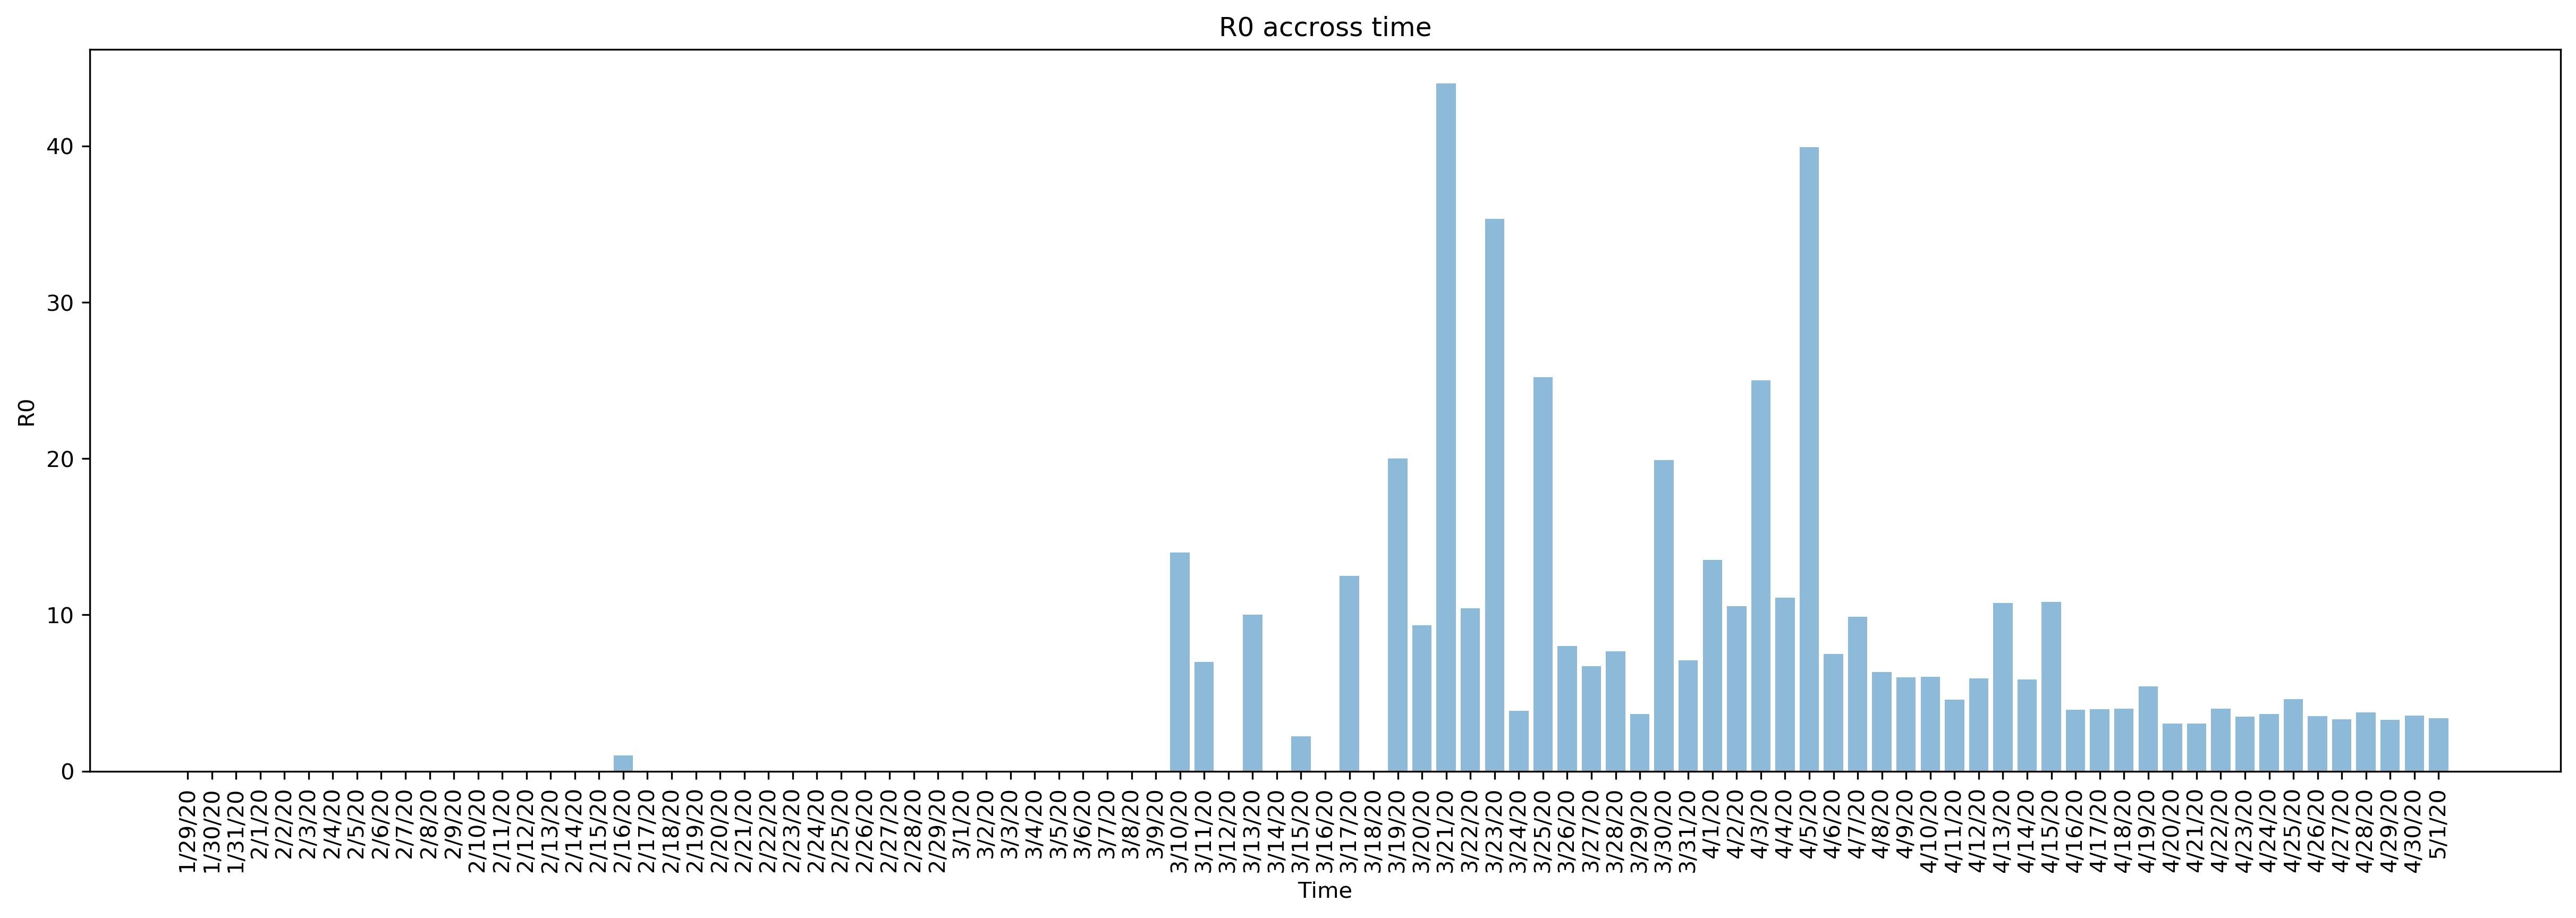

In [165]:
fig = plt.figure(figsize = (20,6), dpi = 300)
plt.bar(DateofPlace, R0, align='center', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('R0')
plt.xticks(rotation=90)
plt.title('R0 accross time')

plt.show()

In [168]:
#Q2: How many people will catch the disease
#Thus I(end) = 0
#q = rx/a
q = list()
for x in range(len(a)):
    if(a[x] == 0):
        q.append(0)
    else:
        q.append((rx[x] / a[x]))
print(q)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.260932787769208e-10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0165306301448763e-08, 5.082653176557744e-09, 0, 7.260933220082622e-09, 0, 1.613540762437163e-09, 0, 9.07616699300352e-09, 0, 1.4521867758194145e-08, 6.7768718960465454e-09, 3.194811240844021e-08, 7.57211795270986e-09, 2.5655305723034744e-08, 2.7926676329218853e-09, 1.829756000490755e-08, 5.8087495453228525e-09, 4.87520117674544e-09, 5.566719538981597e-09, 2.6450562764087142e-09, 1.4461372282227898e-08, 5.1431665092843185e-09, 9.81740187490852e-09, 7.66857969286197e-09, 1.8152369203808013e-08, 8.058231522947584e-09, 2.8987960119475504e-08, 5.447704349370141e-09, 7.176252522899614e-09, 4.613605931435132e-09, 4.352101521024654e-09, 4.369105842818276e-09, 3.3241213267208503e-09, 4.304729030019996e-09, 7.805570678374763e-09, 4.250924969601096e-09, 7.85897272045959e-09, 2.8488468782809895e-09, 2.8787266276171914e-09, 2.902823703930975e-09, 3.930103